In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

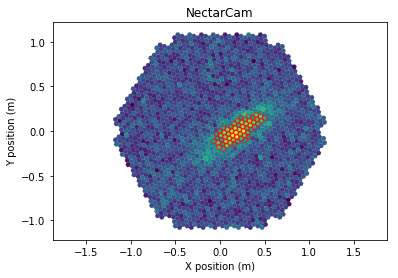

In [2]:
# %load ../camera_display.py
#!/usr/bin/env python3

"""
Example of drawing a Camera using a toymodel shower image.
"""

import matplotlib.pylab as plt
from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay
from ctapipe.image import toymodel, tailcuts_clean, dilate


# Load the camera
geom = CameraGeometry.from_name("NectarCam")

# Create a fake camera image to display:
model = toymodel.generate_2d_shower_model(centroid=(0.2, 0.0),
                                          width=0.01,
                                          length=0.1,
                                          psi='35d')

image, sig, bg = toymodel.make_toymodel_shower_image(geom, model.pdf,
                                                     intensity=50,
                                                     nsb_level_pe=1000)

# Apply image cleaning
cleanmask = tailcuts_clean(geom, image, picture_thresh=200,
                           boundary_thresh=100)
clean = image.copy()
clean[~cleanmask] = 0.0

disp = CameraDisplay(geom, image=image)
disp.highlight_pixels(cleanmask, color='red')

In [3]:
from ctapipe.image.cleaning import dilate

In [4]:
def show_dilate(mask, times=1):
    m = mask.copy()
    for ii in range(times):
        m = dilate(geom, m)
    CameraDisplay(geom,image=(m.astype(int)+mask.astype(int)), title='dilate{}'.format(times))

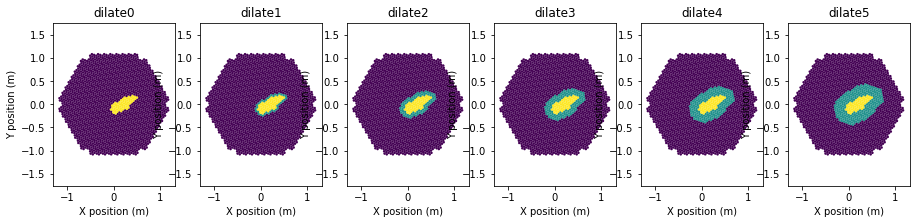

In [5]:
plt.figure(figsize=(18,3))

for ii in range(0,6):
    plt.subplot(1,7,ii+1)
    show_dilate(cleanmask.copy(), times=ii)